**Librerías**

In [87]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.impute import MissingIndicator # Es una función que permite identificar los datos faltantes
from sklearn.impute import SimpleImputer # Método de imputación 
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import LocalOutlierFactor # Algoritmo LOF

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.special import entr # Entropía de Shannon

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import r_regression # Selección de características para regresión basado en el coeficiente de correlación de Pearson
from sklearn.feature_selection import SelectKBest # Seleccionar las mejores características
from sklearn.linear_model import LinearRegression # Algoritmo para crear el modelo de regresión lineal múltiple
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales
from sklearn.ensemble import VotingRegressor # Voto Mayoritario para Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
 
from sklearn.feature_selection import mutual_info_regression # Selección de características para regresión basado en información mutua


In [6]:
pathfile='wind_dataset.csv'
df = pd.read_csv(pathfile, header=0, sep=',')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [8]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


**Detección de valores nulos**

In [9]:
# Calcular la cantidad de valores NaN en cada columna
nans_por_col = df.isna().sum()

# Calcular el porcentaje de valores NaN en cada columna
porcentaje_nans_por_col = (nans_por_col / len(df)) * 100

# Crear un DataFrame que muestre los resultados
resultados = pd.concat([nans_por_col, porcentaje_nans_por_col], axis=1, keys=['Cantidad de NaN', 'Porcentaje de NaN'])

resultados = resultados.sort_values(by='Cantidad de NaN', ascending=True)
resultados=resultados.reset_index()
print(resultados)

     index  Cantidad de NaN  Porcentaje de NaN
0     DATE                0           0.000000
1     WIND                0           0.000000
2      IND                0           0.000000
3     RAIN                0           0.000000
4    IND.1               61           0.927898
5    IND.2               61           0.927898
6  T.MIN.G              360           5.476118
7    T.MAX              621           9.446304
8    T.MIN              674          10.252510


In [13]:
Indicador = MissingIndicator(missing_values = np.nan)
Indicador.fit(df) 
Datos_Indicador = Indicador.transform(df) # Realizamos una transformación Booleana de los datos para identificar los datos faltantes (True)
                                             # y los datos no faltantes (False)
print("Características donde hay datos faltantes: ", Indicador.features_)

Características donde hay datos faltantes:  [4 5 6 7 8]


In [14]:
POS = np.where(Datos_Indicador == True) # Se busca aquellos datos que tiene un valor Booleanos igual a True
print("Porcentaje de Datos Faltantes (%): ", 100*(len(POS[0])/(Datos_Indicador.shape[0]*Datos_Indicador.shape[1])))

Porcentaje de Datos Faltantes (%):  5.40614542135686


**Imputación de dastos**

In [16]:
#Se separa el df para tener los datos cuantitativos en un dataframe y los cualitativos en otro
#en caso de que aplique
df_cunatitativo=df[['WIND','IND','RAIN','IND.1','T.MAX','IND.2','T.MIN','T.MIN.G']]
df_cunatitativo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6513 non-null   float64
 4   T.MAX    5953 non-null   float64
 5   IND.2    6513 non-null   float64
 6   T.MIN    5900 non-null   float64
 7   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 411.0 KB


In [17]:
#Se aplica inputación simple con la mediana
imp = SimpleImputer(missing_values = np.nan, strategy= 'median') 
imp.fit(df_cunatitativo)
Datos_Imputacion_Mediana = imp.transform(df_cunatitativo)
nombres = df_cunatitativo.columns
Datos_Imputacion_Mediana = pd.DataFrame(Datos_Imputacion_Mediana, columns = nombres)
display(Datos_Imputacion_Mediana)

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,13.67,0.0,0.2,0.0,9.5,0.0,3.7,-1.0
1,11.50,0.0,5.1,0.0,7.2,0.0,4.2,1.1
2,11.25,0.0,0.4,0.0,5.5,0.0,0.5,-0.5
3,8.63,0.0,0.2,0.0,5.6,0.0,0.4,-3.2
4,11.92,0.0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...
6569,14.46,0.0,16.8,0.0,9.8,0.0,4.0,0.0
6570,14.33,0.0,16.0,0.0,9.1,0.0,8.5,8.0
6571,19.17,0.0,14.7,0.0,5.0,0.0,3.5,3.2
6572,18.08,0.0,4.9,0.0,2.9,0.0,0.3,-0.5


In [18]:
Datos_Imputacion_Mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   float64
 2   RAIN     6574 non-null   float64
 3   IND.1    6574 non-null   float64
 4   T.MAX    6574 non-null   float64
 5   IND.2    6574 non-null   float64
 6   T.MIN    6574 non-null   float64
 7   T.MIN.G  6574 non-null   float64
dtypes: float64(8)
memory usage: 411.0 KB


In [19]:
data_Imputada=Datos_Imputacion_Mediana.copy()

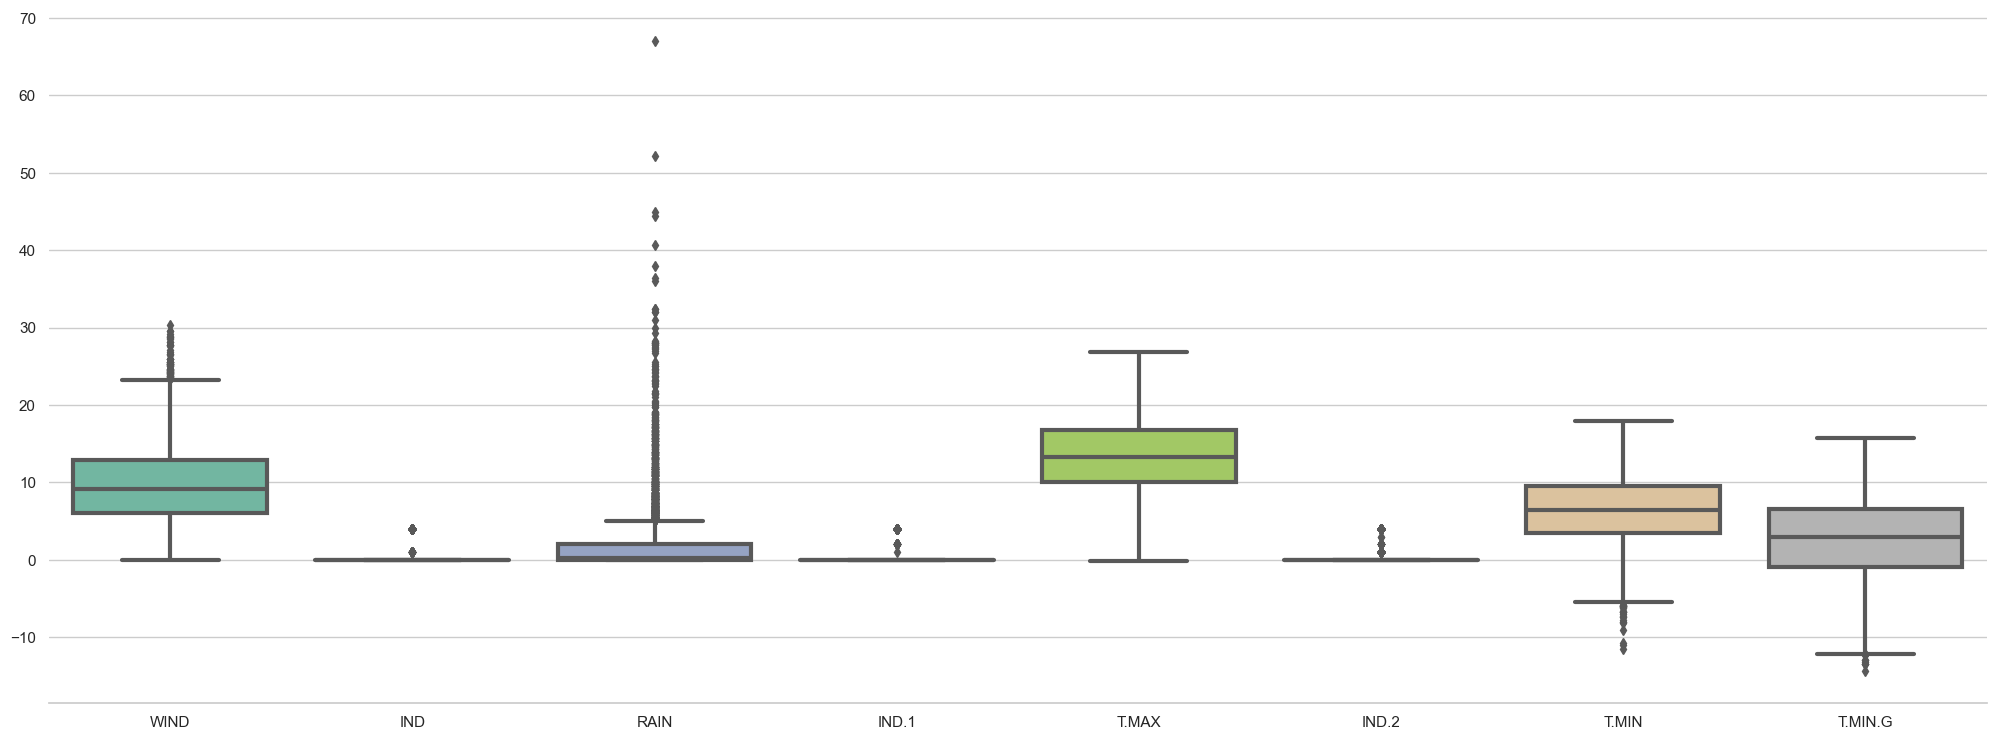

In [22]:
#Se realiza un diagrama de cajas inicial para observar la distribución de los datos
sns.set(rc={'figure.figsize':(25,9)}) 
sns.set(style="whitegrid") 
sns.boxplot(data = data_Imputada, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

**Se escalan los datos para estandarizarlos**

In [23]:
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1)) 
nombres = data_Imputada.columns
Datos_Min_Max = MinMax.fit_transform(data_Imputada)
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)

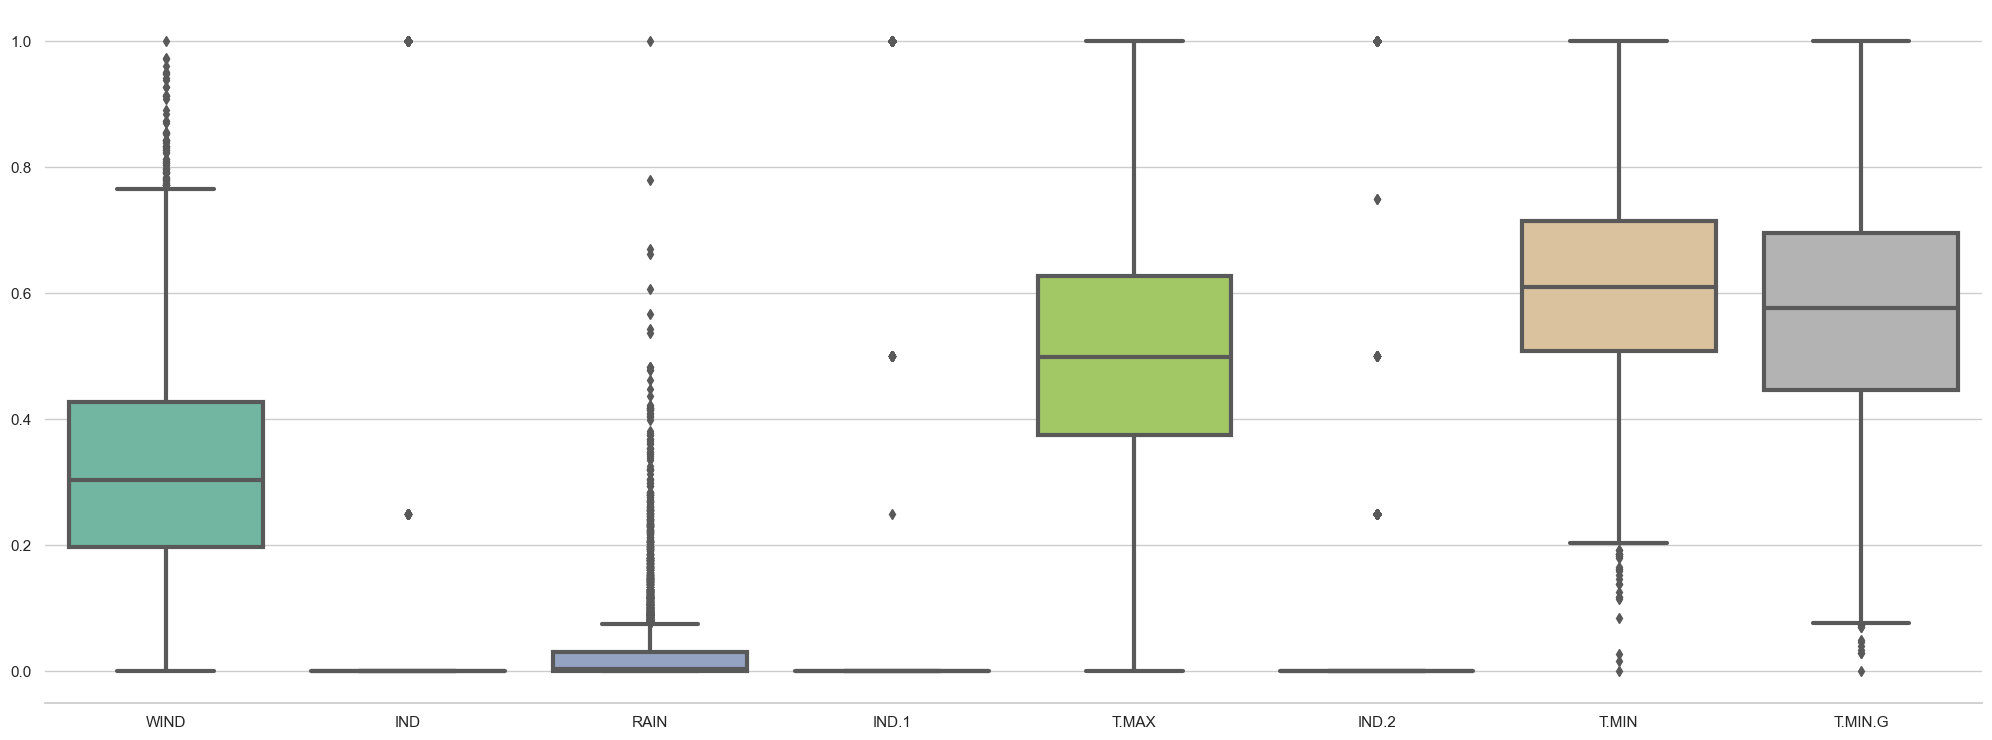

In [24]:
#Se realiza un diagrama de cajas a los datos normalizados
sns.set(rc={'figure.figsize':(25,9)}) 
sns.set(style="whitegrid") 
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

**Detección de datos atípicos**

In [27]:
LOF = LocalOutlierFactor(n_neighbors = 3, algorithm = 'auto', contamination = 'auto', metric = 'euclidean') 

Filtrado = LOF.fit_predict(Datos_Min_Max) 
NOF = LOF.negative_outlier_factor_ 

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min())
ground_truth = np.ones(len(Datos_Min_Max), dtype = int) 
n_errors = (Filtrado != ground_truth).sum() # número de datos atípicos

In [28]:
print("Número de muestras o filas con datos atípicos: ", n_errors)

Número de muestras o filas con datos atípicos:  222


In [30]:
pos = np.where(Filtrado == ground_truth) # Se identifican en que muestras o filas de nuestra base de datos hay presencia de datos atípicos
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_LOF = Datos_Min_Max.loc[pos, :]
print(Datos_Min_Max.shape) # Tamaño de los datos originales
print(datos_sin_outilers_LOF.shape) # Tamañno de los datos sin outliers 

#Datos sin outliers y sin normalizar
data_ori=data_Imputada.loc[pos, :]


(6574, 8)
(6352, 8)


In [42]:
H_1 = entr(Datos_Min_Max[['WIND','IND','RAIN','IND.1','T.MAX','IND.2','T.MIN','T.MIN.G']])
H_2 = entr(datos_sin_outilers_LOF[['WIND','IND','RAIN','IND.1','T.MAX','IND.2','T.MIN','T.MIN.G']])

entropia_normalizada_1 = H_1.sum()/Datos_Min_Max.shape[0]
entropia_normalizada_2 = H_2.sum()/datos_sin_outilers_LOF.shape[0]

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia LOF'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2], axis = 1)

display(Comparacion_entropias)

,Entropia Original,Entropia LOF
WIND,0.323035,0.323829
IND,0.002636,0.002182
RAIN,0.064622,0.062778
IND.1,0.002161,0.001746
T.MAX,0.314742,0.315108
IND.2,0.028850,0.027915
T.MIN,0.283525,0.283363
T.MIN.G,0.290632,0.290833


In [31]:
DatosFiltrados=datos_sin_outilers_LOF.copy()
Features = DatosFiltrados[['WIND','IND','RAIN','IND.1','T.MAX','IND.2','T.MIN','T.MIN.G']]

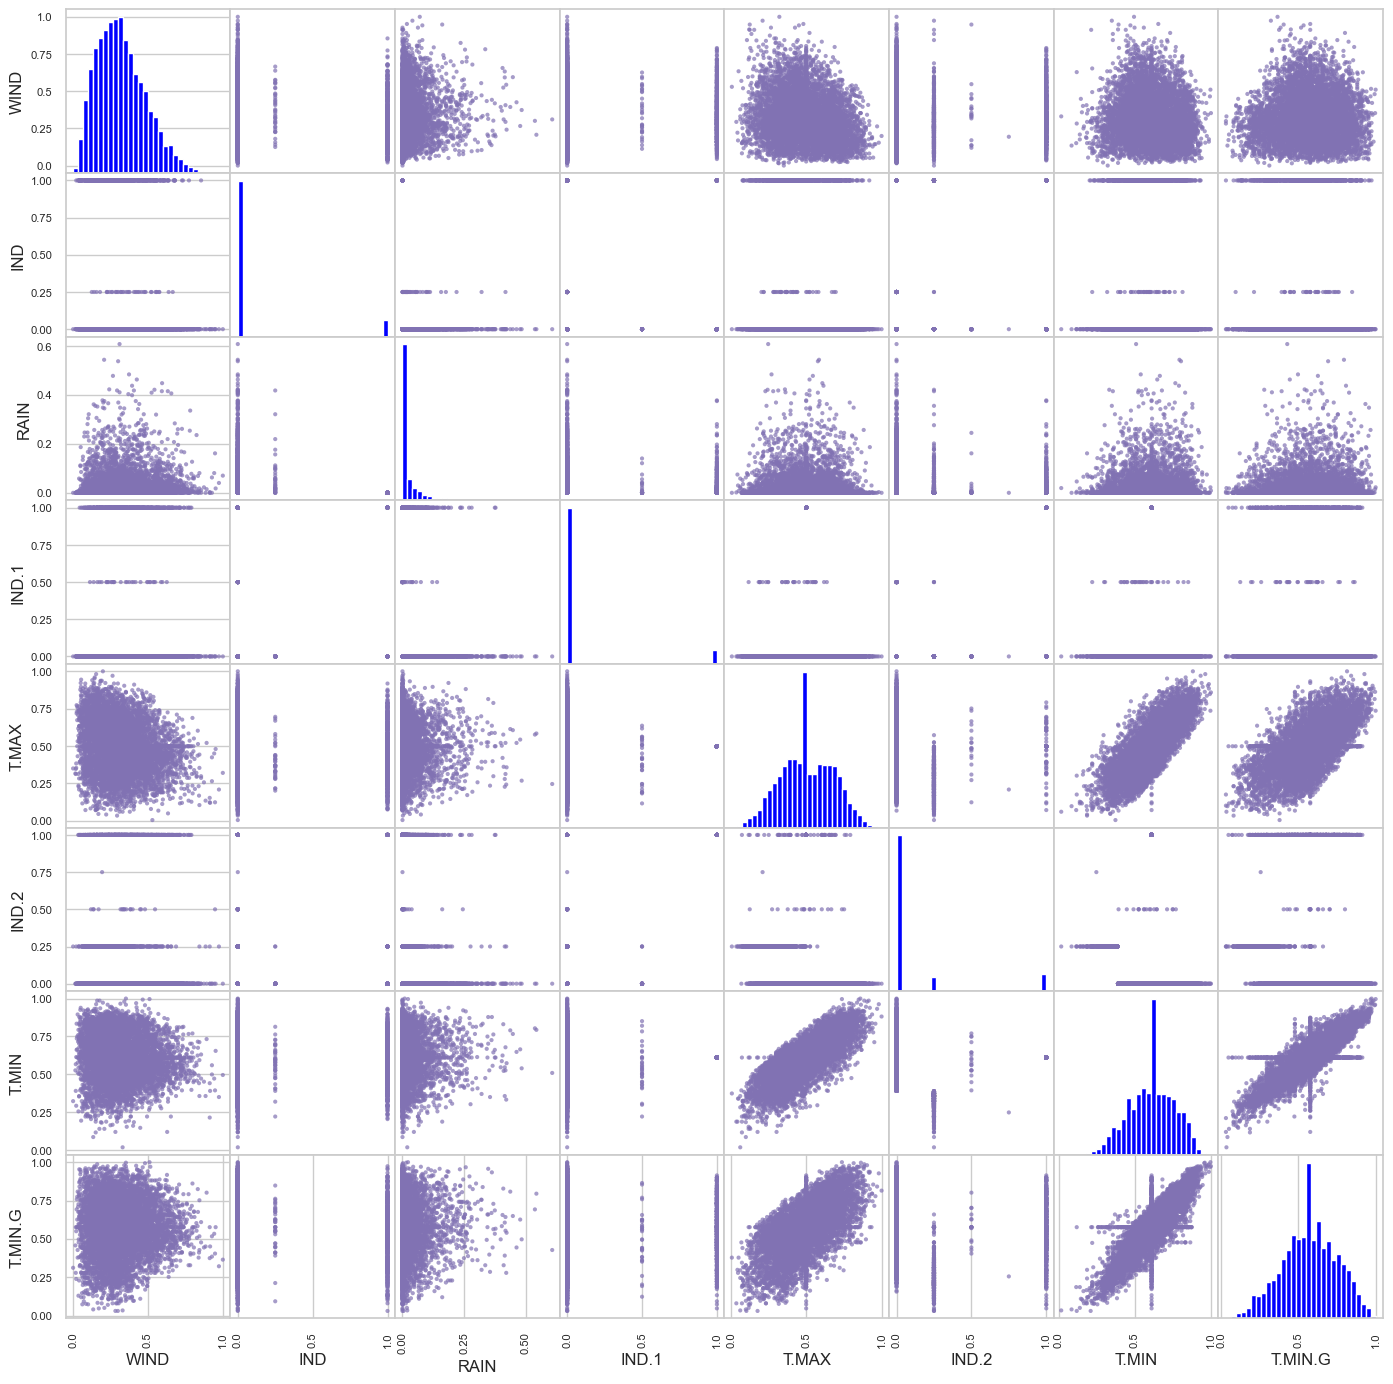

In [36]:
#Se realiza una gráfica para observar la correlación de los datos
pd.plotting.scatter_matrix(Features, alpha=0.7, figsize=(17,17), range_padding = 0.1, diagonal='hist',
                           color = 'm', hist_kwds = {'bins':30, 'color':'blue'}) # Grafica de dispersión e histograma
plt.show()

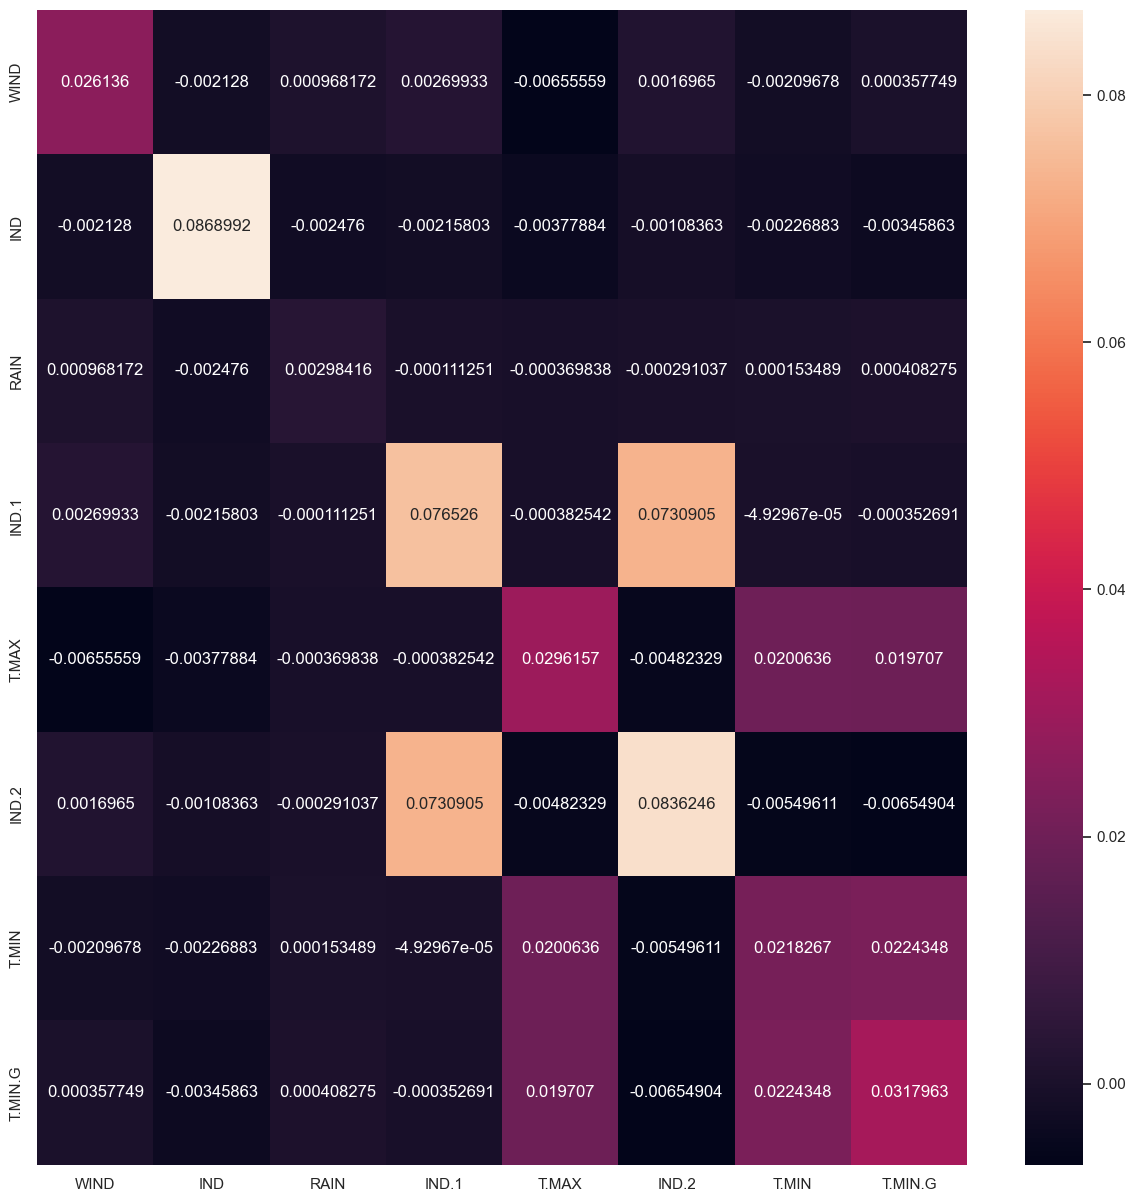

In [38]:
Matrix_Covarianza = np.cov(Features.transpose(), bias=True) # bias = True normaliza los datos (les recomienda esa opción)
Caracteristicas = Features.columns

plt.figure(figsize=(15,15))
ax = sns.heatmap(Matrix_Covarianza, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

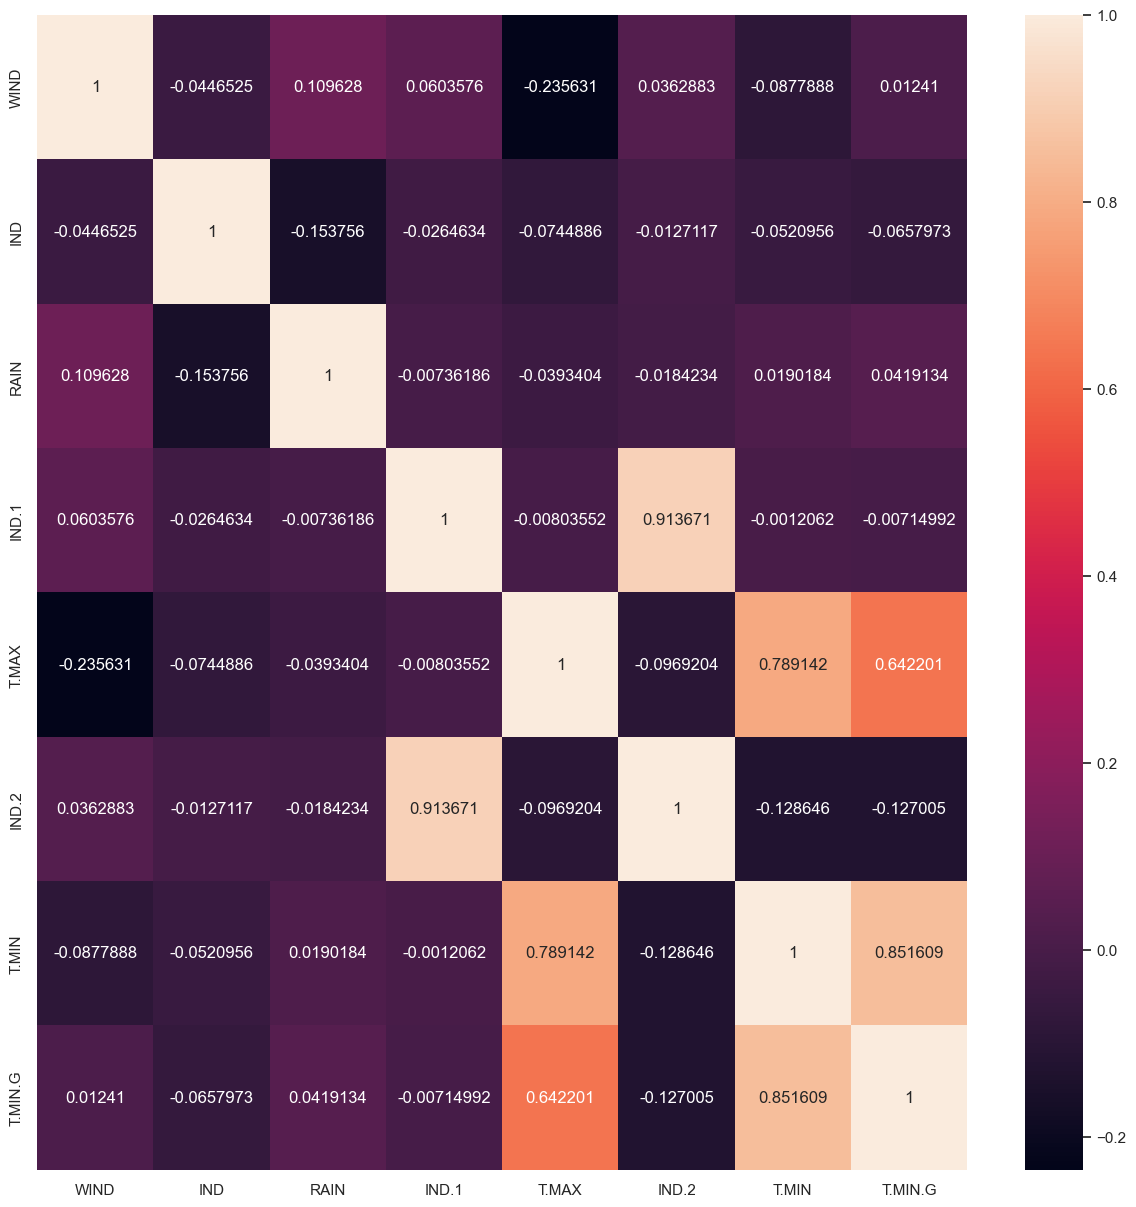

In [39]:
Matriz_Correlacion = Features.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(Matriz_Correlacion, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

**Correlación de pearson**

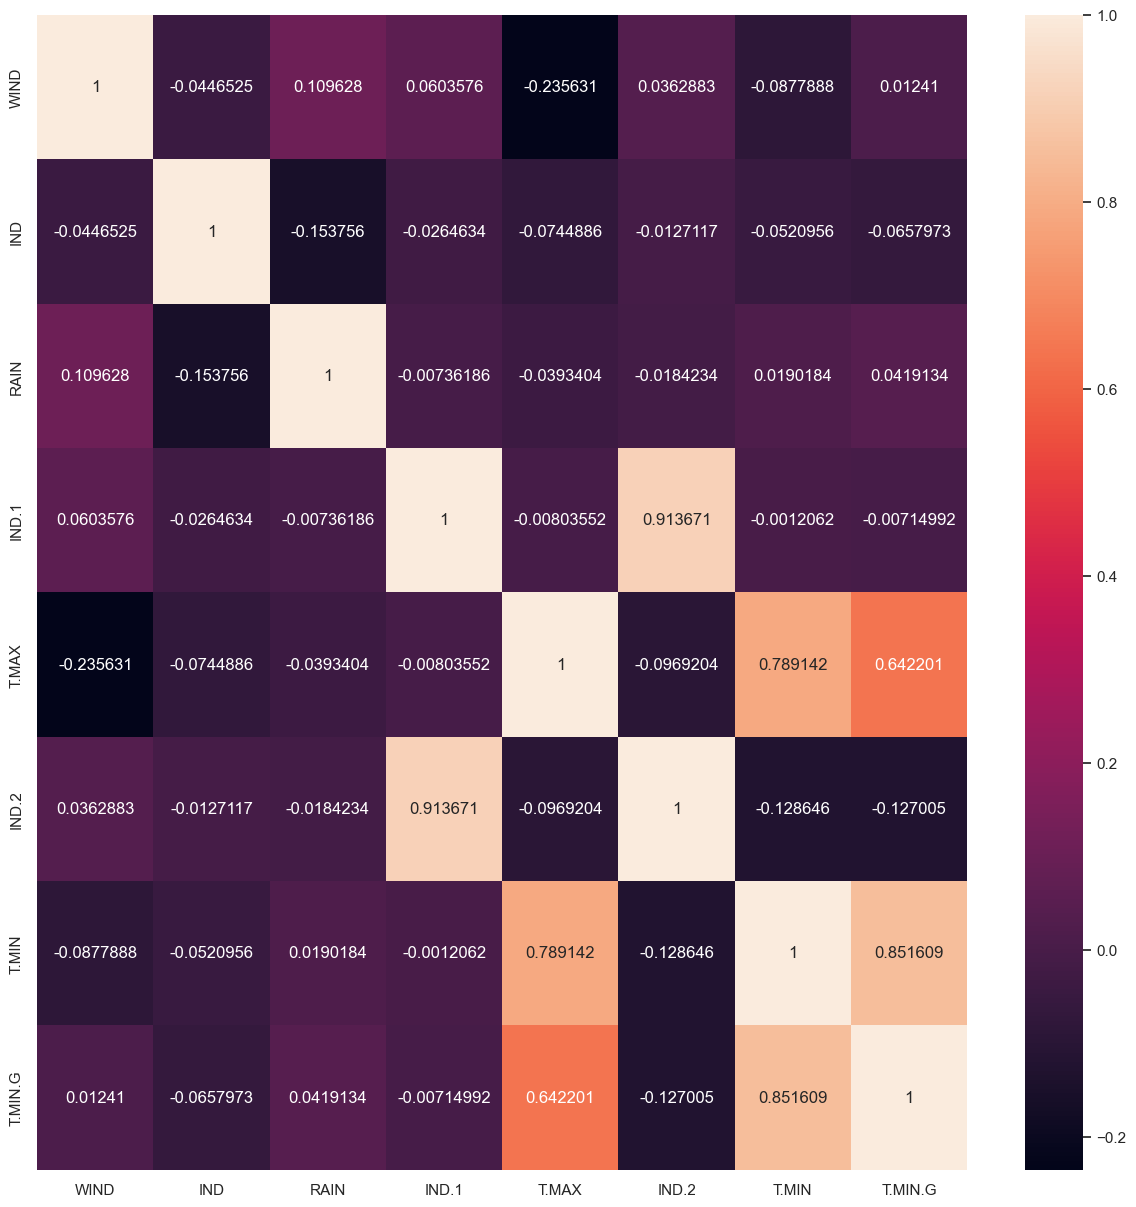

In [43]:
#Análisis con el coeficiente de correlación de person
r = []
valor_p = []
Data_diabetes = Features.values
Data_diabetes = np.asarray(Data_diabetes)

for _,n in enumerate(np.arange(0,Data_diabetes.shape[1])):
  for _,m in enumerate(np.arange(0,Data_diabetes.shape[1])):  
      r_valor, p_valor = pearsonr(Data_diabetes[:,n], Data_diabetes[:,m])
      r.append(r_valor)
      valor_p.append(p_valor)

r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(Data_diabetes.shape[1],Data_diabetes.shape[1])
p_value = valor_p.reshape(Data_diabetes.shape[1],Data_diabetes.shape[1])

plt.figure(figsize=(15,15))
ax = sns.heatmap(pearson_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

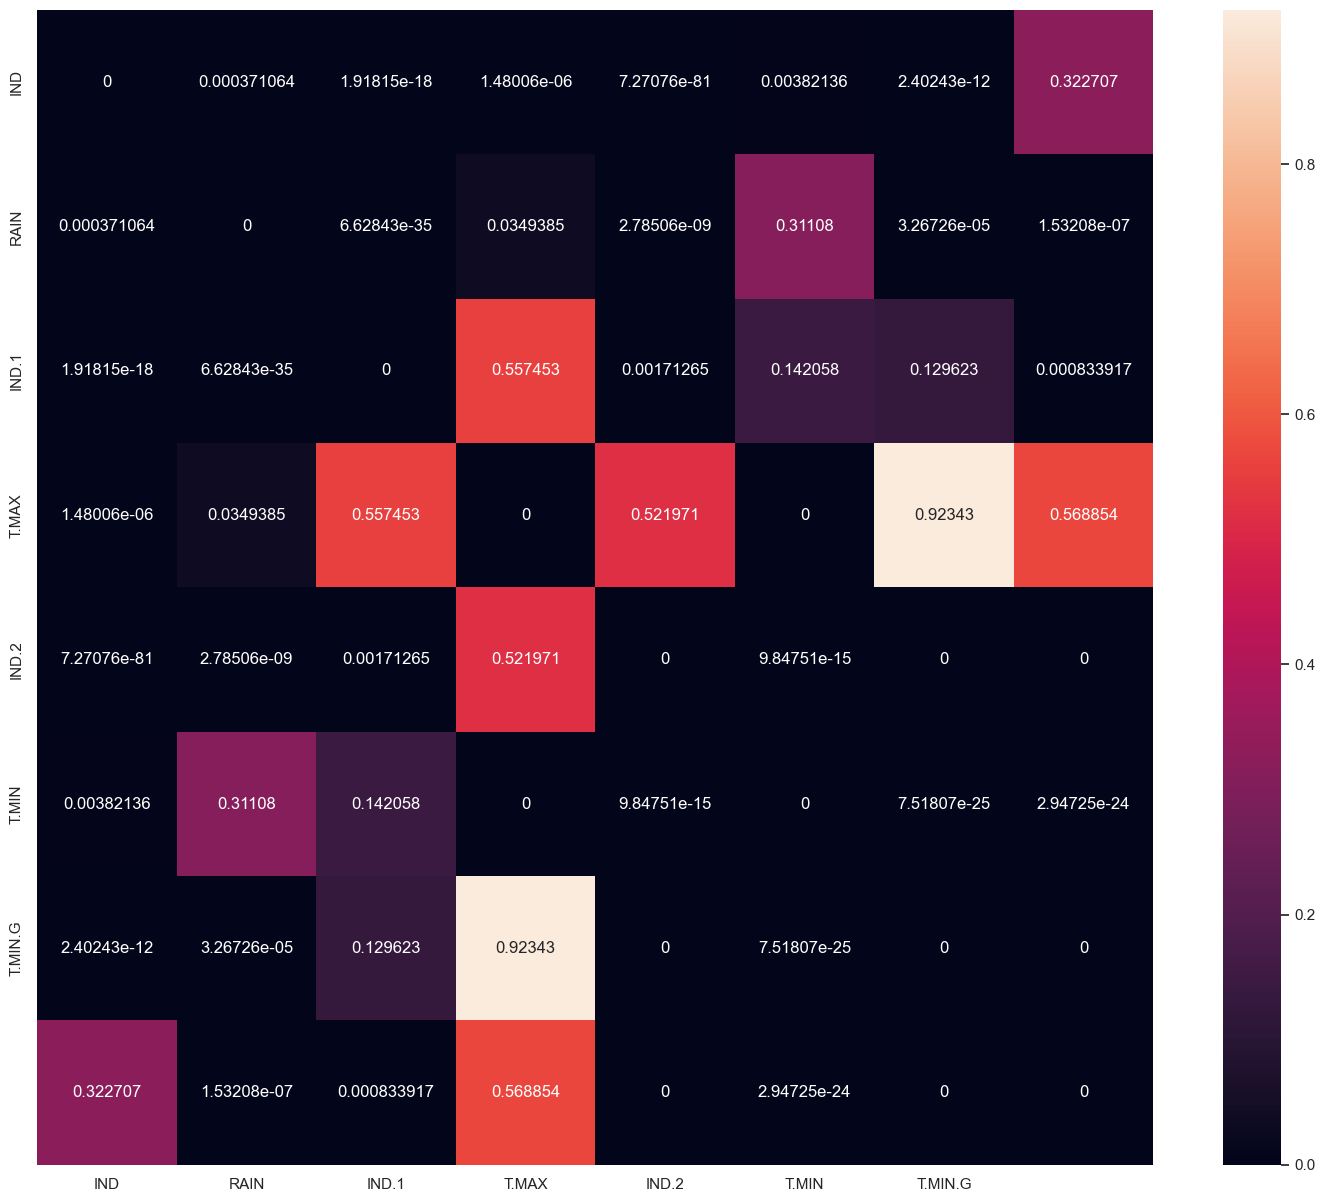

In [97]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

**Correlación de spearman**

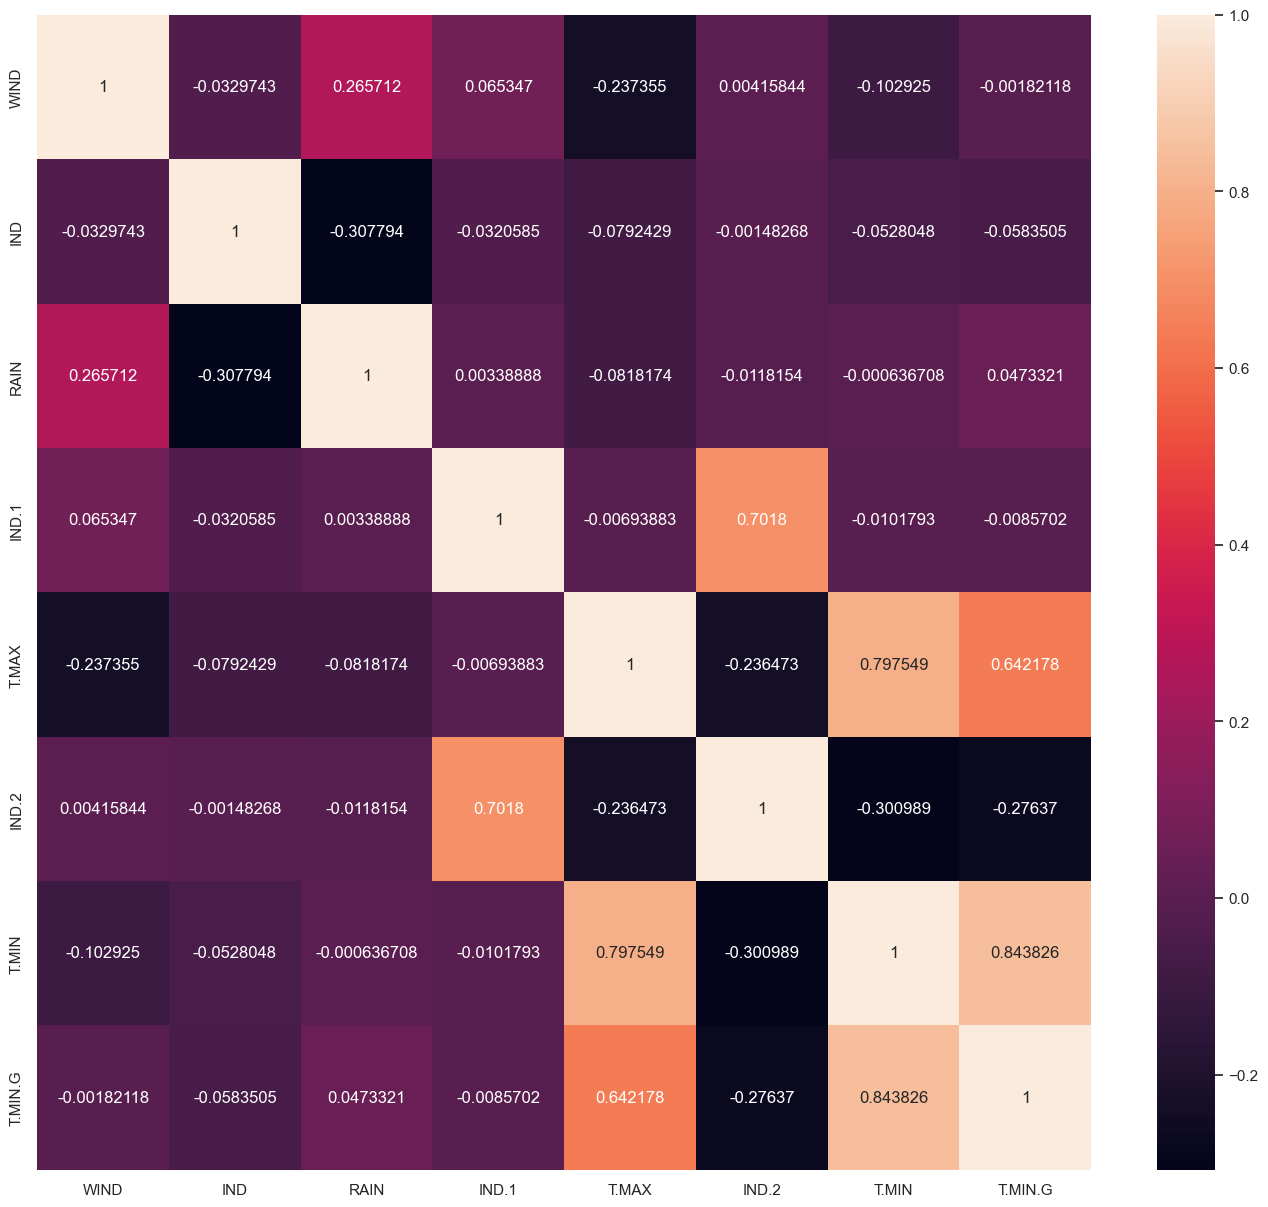

In [44]:
#Cálculo de la correlación de spearman
spearman = []
valor_ps = []
Data_diabetes = Features.values
Data_diabetes = np.asarray(Data_diabetes)

for _,n in enumerate(np.arange(0,Data_diabetes.shape[1])):
  for _,m in enumerate(np.arange(0,Data_diabetes.shape[1])):  
      s_valor, p_valor = spearmanr(Data_diabetes[:,n], Data_diabetes[:,m])
      spearman.append(s_valor)
      valor_ps.append(p_valor)

spearman = np.asarray(spearman)
valor_ps = np.asarray(valor_ps)

spearman_r = spearman.reshape(Data_diabetes.shape[1],Data_diabetes.shape[1])
p_value_s = valor_ps.reshape(Data_diabetes.shape[1],Data_diabetes.shape[1])

plt.figure(figsize=(17,15))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

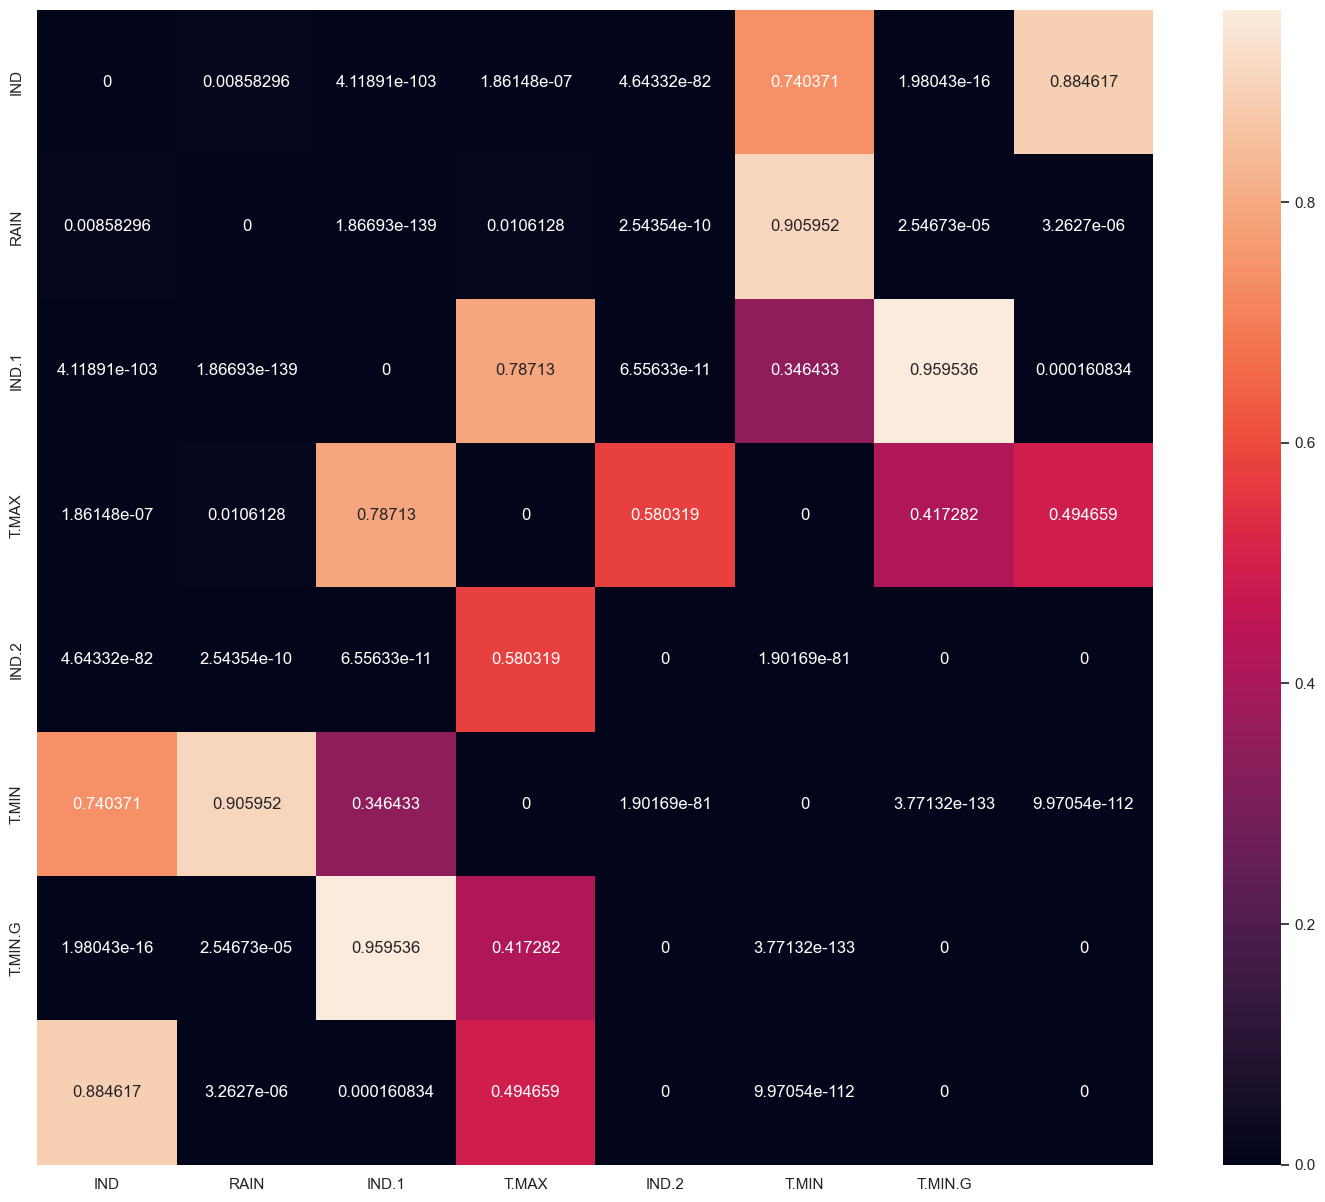

In [98]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value_s, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

**Modelo de Regresión**

In [45]:
X_Norm=DatosFiltrados[['IND','RAIN','IND.1','T.MAX','IND.2','T.MIN','T.MIN.G']]
Y_Norm=DatosFiltrados[['WIND']]

In [48]:
X_Norm_Train, X_Norm_Test, Y_Train, Y_Test = train_test_split(X_Norm, Y_Norm, 
                                                              test_size = 0.25, 
                                                              train_size = 0.75, )
print("Tamaño de los Datos de Entrenamiento = ", X_Norm_Train.shape)
print("Tamaño de los Datos de Validación = ", X_Norm_Test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", Y_Train.shape)
print("Tamaño del Vector de Clases de Prueba = ", Y_Test.shape)

Tamaño de los Datos de Entrenamiento =  (4764, 7)
Tamaño de los Datos de Validación =  (1588, 7)
Tamaño del Vector de Clases de Entrenamiento =  (4764, 1)
Tamaño del Vector de Clases de Prueba =  (1588, 1)


**Regresión por pasos**

In [50]:
X_Norm_Train = pd.DataFrame(X_Norm_Train, columns = X_Norm_Train.columns)
x = X_Norm_Train
y = Y_Train

In [53]:
Caracteristicas=['IND','RAIN','IND.1','T.MAX','IND.2','T.MIN','T.MIN.G']
R_Pearson = r_regression(x, y)
Tabla = pd.DataFrame(R_Pearson, index = Caracteristicas, columns = ['Valor R'])
display(Tabla)

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Valor R
IND,-0.044267
RAIN,0.118539
IND.1,0.058252
T.MAX,-0.236356
IND.2,0.037338
T.MIN,-0.090368
T.MIN.G,0.013702


In [66]:
Seleccion = SelectKBest(r_regression, k = 6)
X_select = Seleccion.fit_transform(x, y)
display(Seleccion.get_feature_names_out())

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['IND', 'RAIN', 'IND.1', 'IND.2', 'T.MIN', 'T.MIN.G'], dtype=object)

In [67]:
Modelo_LR_select_features = LinearRegression()
Modelo_LR_select_features.fit(X_select,y)

LinearRegression()

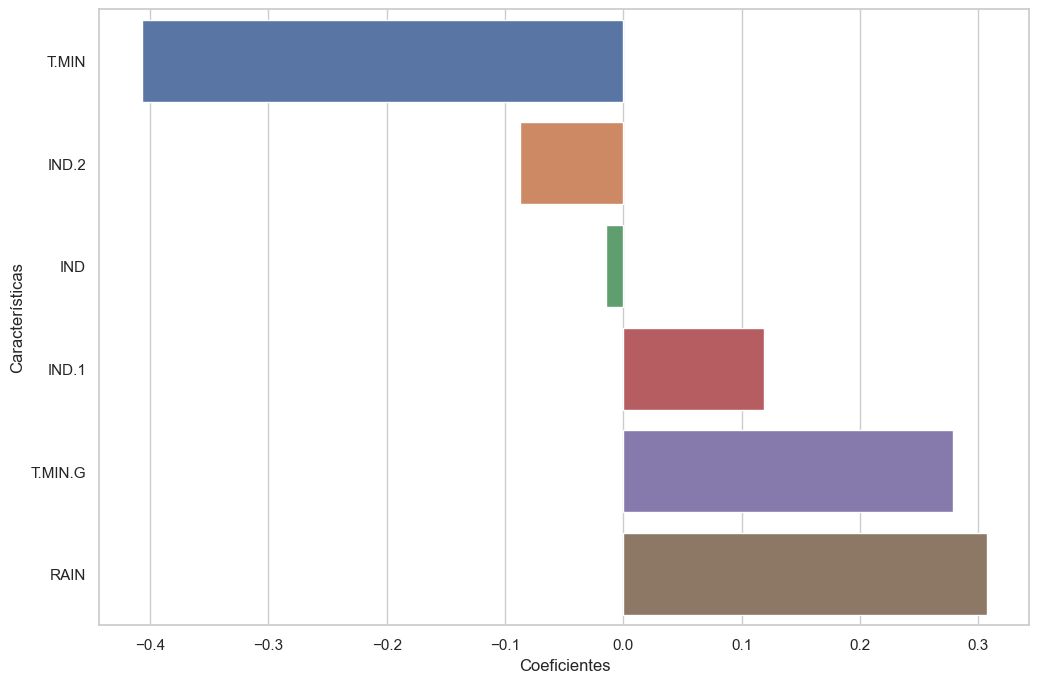

In [68]:
Caracteristicas_Seleccionadas = Seleccion.get_feature_names_out()
importancia = Modelo_LR_select_features.coef_ # Importancia de las características
importancia = pd.DataFrame(importancia.T, 
                           index = Caracteristicas_Seleccionadas, columns = ['Puntaje'])
importancia_ordenada = importancia.sort_values(by = ['Puntaje'])
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

fig = plt.figure(figsize=(12,8))
sns.barplot(y = importancia_ordenada.index, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

In [69]:
X_Norm_Test = pd.DataFrame(X_Norm_Test, columns = X_Norm_Test.columns)
X_Norm_Test_Seleccionados = X_Norm_Test[Seleccion.get_feature_names_out()]

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


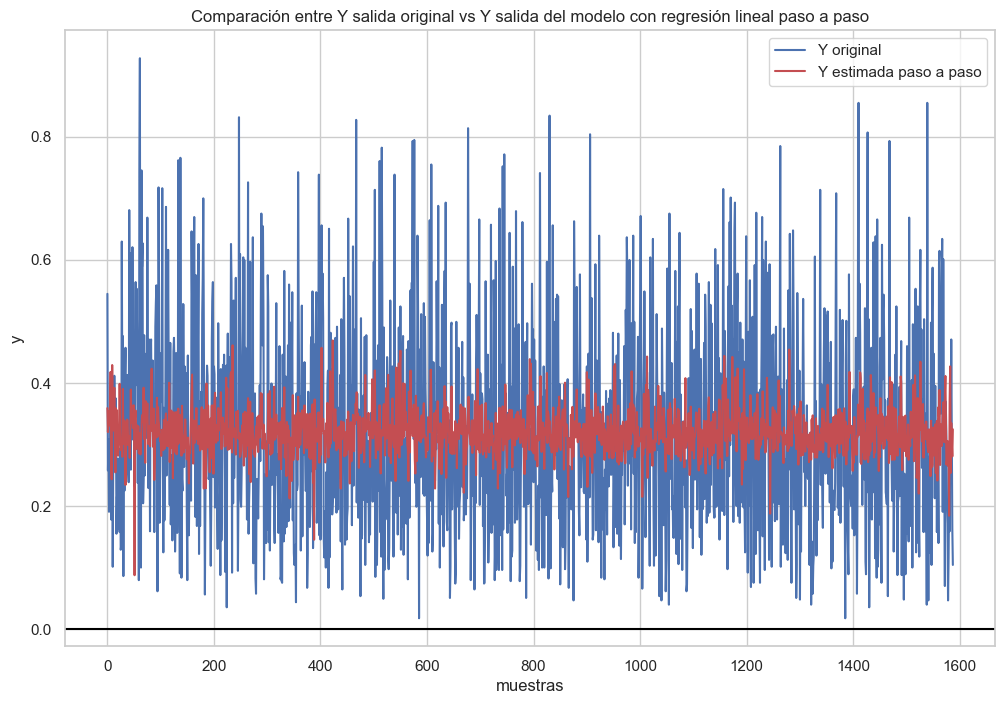

In [70]:
Y_predi = Modelo_LR_select_features.predict(X_Norm_Test_Seleccionados) # Estima los valores de salida del modelo de regresión

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, 
                  color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_predi, 
                  color = 'r', label='Y estimada paso a paso') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal paso a paso') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y
plt.show() # Mostrar gráfica

In [73]:
Puntaje_1 = Modelo_LR_select_features.score(X_Norm_Test_Seleccionados.values, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(Modelo_LR_select_features, X_Norm_Test_Seleccionados, 
                             Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.0471
Media = -0.0253
Desviación Estándar = 0.001430151429040


In [74]:
Validacion_R2 = cross_val_score(Modelo_LR_select_features, 
                                X_Norm_Test_Seleccionados, 
                                Y_Test, cv = 5, scoring = 'r2')
Puntaje_3 = np.array([Validacion_R2.mean(), Validacion_R2.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada con coeficiente de determinación
print("Media o R2 promedio = {:.4f}".format(Puntaje_3[0]))
print("Desviación Estándar de R2 = {:.4f}".format(Puntaje_3[1]))

Media o R2 promedio = 0.0313
Desviación Estándar de R2 = 0.0104


**Información Mutua**

In [75]:
x=X_Norm
y=Y_Norm

In [78]:
MI = mutual_info_regression(x, y, discrete_features = 'auto', n_neighbors = 3)
Tabla_MI = pd.DataFrame(MI, index = Caracteristicas, columns = ['Valor MI'])
display(Tabla_MI)

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Valor MI
IND,0.002465
RAIN,0.040029
IND.1,0.008303
T.MAX,0.032208
IND.2,0.000000
T.MIN,0.024628
T.MIN.G,0.023200


In [80]:
Seleccion_MI = SelectKBest(mutual_info_regression, k = 7)
X_select_MI = Seleccion_MI.fit_transform(x, y)
display(Seleccion_MI.get_feature_names_out())

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN', 'T.MIN.G'],
      dtype=object)

**Regresión polinómica**

In [81]:
X_train_select = X_Norm_Train[Seleccion_MI.get_feature_names_out()]
X_test_select = X_Norm_Test[Seleccion_MI.get_feature_names_out()]

In [82]:
Modelo_Polinomico = PolynomialFeatures(degree = 3, interaction_only=True) # Se aplica la regresión polinómica con grado = 3
# interaction_only es una condición donde si es True solamente se producen las interaciones entre características que son la
# mayoría de grados distintos a las caracteristicas de los datos                                                                       

X_poly_entrenamiento = Modelo_Polinomico.fit_transform(X_train_select) # Transformamos los datos de las características de los datos en datos con características polinomiales
X_poly_prueba = Modelo_Polinomico.fit_transform(X_test_select) # Transformamos los datos de las características de los datos en datos con características polinomiales

In [83]:
LR = LinearRegression()
LR.fit(X_poly_entrenamiento, Y_Train)

LinearRegression()

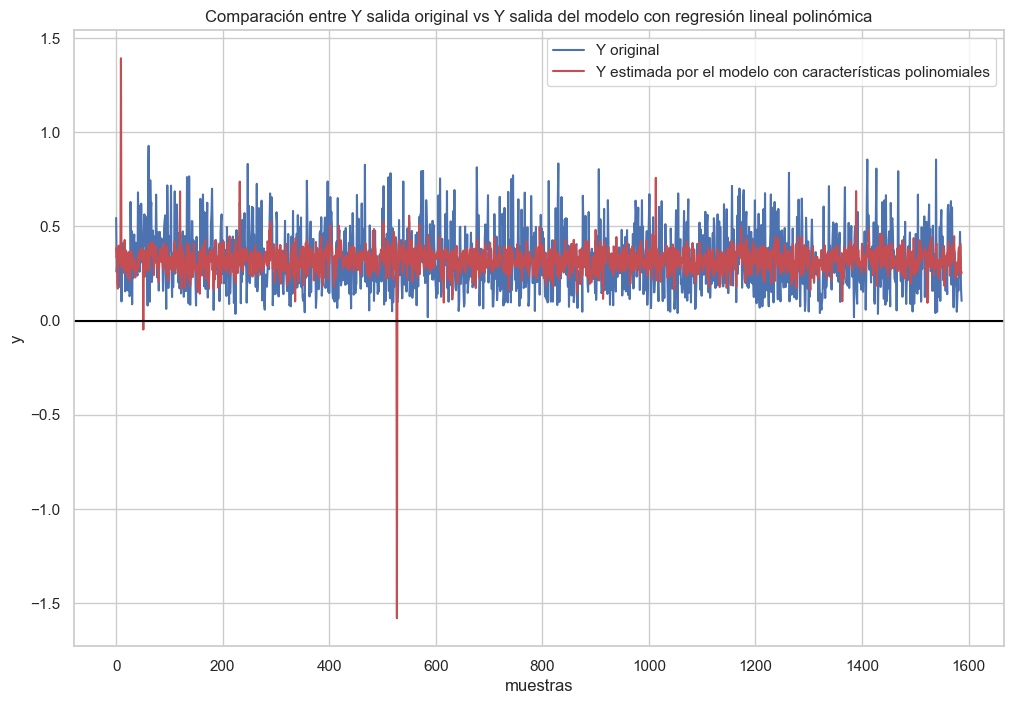

In [84]:
Y_pred = LR.predict(X_poly_prueba)

fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'r', label='Y estimada por el modelo con características polinomiales') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal polinómica') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [85]:
Puntaje_1 = LR.score(X_poly_prueba, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(LR, X_poly_prueba, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.0373
Media = -112052908808659712.0000
Desviación Estándar = 224105817616162560.000000000000000


**Votació mayoritaria por modelos de regresión no lineal**

In [88]:
RF_1 = RandomForestRegressor(n_estimators = 200, criterion = 'absolute_error', max_depth = 7, min_samples_split=2, 
                           min_samples_leaf=1, bootstrap=True, n_jobs = 1, ccp_alpha=0.0)

In [89]:
RF_2 = RandomForestRegressor(n_estimators = 150, criterion = 'squared_error', max_depth = 10, min_samples_split=2, 
                           min_samples_leaf=1, bootstrap=True, n_jobs = 1, ccp_alpha=0.0)

In [90]:
ADA_1 = AdaBoostRegressor(n_estimators = 100, learning_rate = 1.0, loss='linear')

In [91]:
ADA_2 = AdaBoostRegressor(n_estimators = 50, learning_rate = 0.5, loss='exponential')

In [92]:
Votacion = VotingRegressor(estimators=[('Random Forest 1', RF_1), ('Random Forest 2', RF_2), 
                                      ('AdaBoost 1', ADA_1), ('AdaBoost 2', ADA_2)], weights = [0.3, 0.2, 0.25, 0.25])
Votacion.fit(X_Norm_Train, Y_Train)

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('Random Forest 1',
                             RandomForestRegressor(criterion='absolute_error',
                                                   max_depth=7,
                                                   n_estimators=200,
                                                   n_jobs=1)),
                            ('Random Forest 2',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=150,
                                                   n_jobs=1)),
                            ('AdaBoost 1', AdaBoostRegressor(n_estimators=100)),
                            ('AdaBoost 2',
                             AdaBoostRegressor(learning_rate=0.5,
                                               loss='exponential'))],
                weights=[0.3, 0.2, 0.25, 0.25])

In [93]:
Y_pred = Votacion.predict(X_Norm_Test)

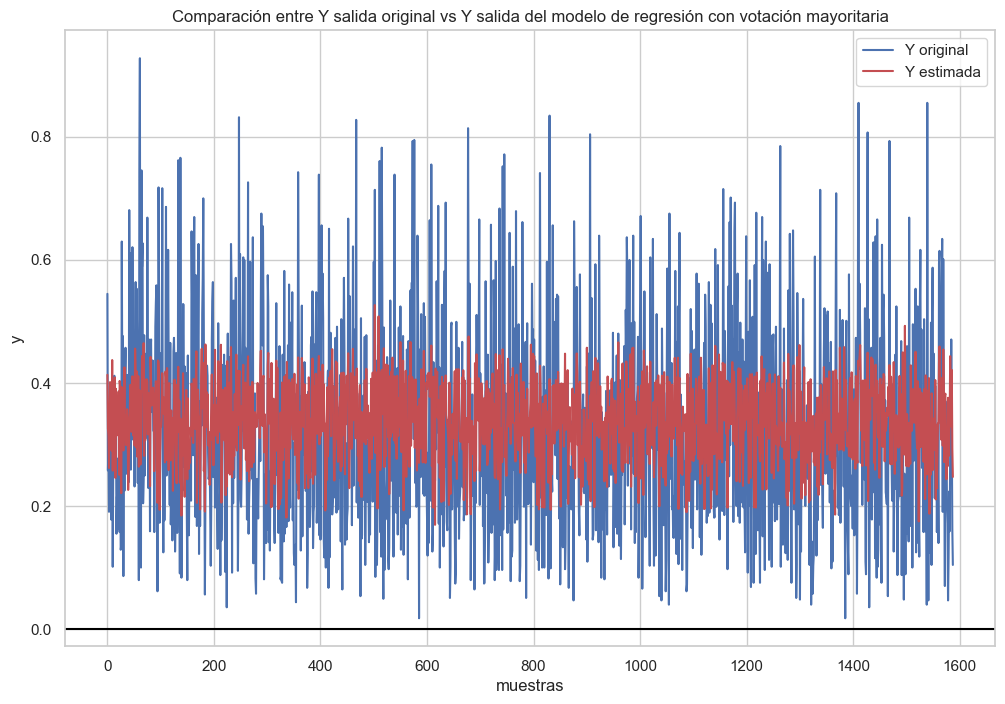

In [94]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'r', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo de regresión con votación mayoritaria') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [95]:
Puntaje_1 = Votacion.score(X_Norm_Test, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(Votacion, X_Norm_Test, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_voting.py:597: DataConve

Puntaje = 0.1854
Media = -0.0217
Desviación Estándar = 0.000892513713776


In [96]:
Puntaje_3 = mean_absolute_error(Y_Test, Y_pred) # Se calcula el error promedio absoluto
print("MAE = {:.4f}".format(Puntaje_3))

MAE = 0.1169
